<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Loveline_Toussaint_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [ ]:
# Your Work Here
import pandas as pd
import numpy as numy
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline # % this is for non python operational code, like for connection to juypter

UsageError: unrecognized arguments: # % this is for non python operational code, like for connection to juypter


In [ ]:
plt.style.use('fast')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [ ]:
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


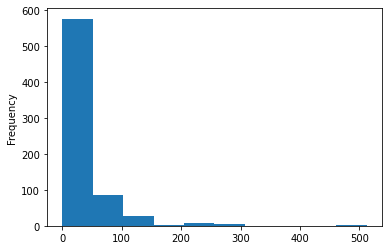

In [ ]:
df['Fare'].plot(kind = 'hist');

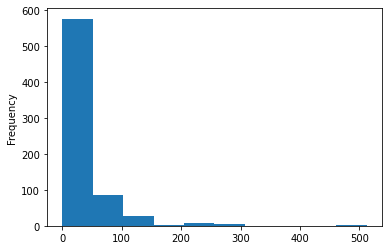

In [ ]:
df['Fare'].plot(kind ='hist'); #histograms are for continous variables


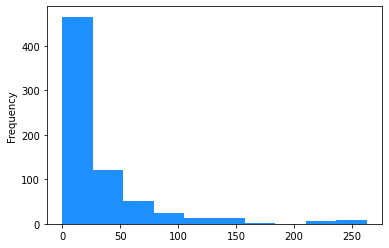

In [ ]:
df = df[df['Fare']<500]
df['Fare'].plot(kind = 'hist', color = 'dodgerblue');


In [ ]:
farebins = [0,8,15,33,512]
farelabels = ['low','medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins = farebins, labels= farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

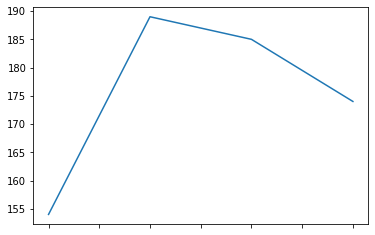

In [ ]:
myresults.plot()

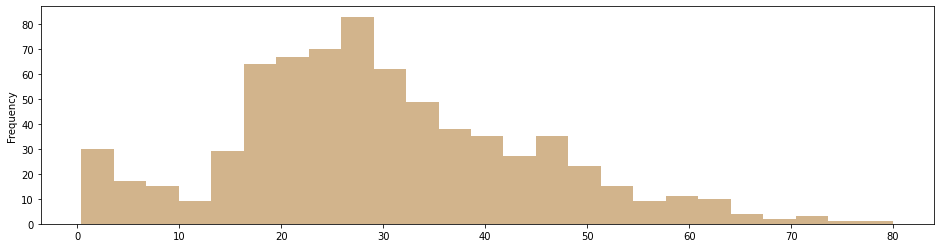

In [ ]:
df['Age'].plot(kind='hist', bins = 25, figsize=(16,4), color ='tan');

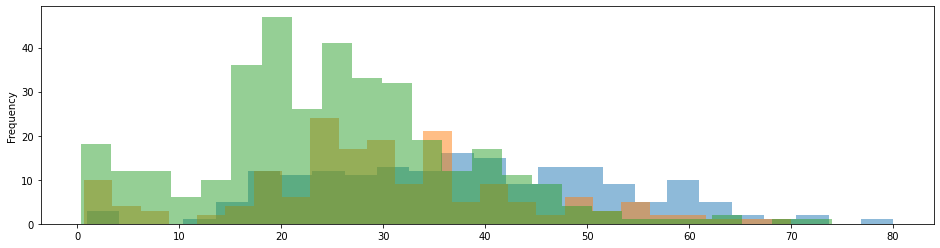

In [ ]:
df[df['Pclass']==1]['Age'].plot(kind='hist', bins = 25, figsize =(16,4), alpha = 0.5)
df[df['Pclass']==2]['Age'].plot(kind ='hist', bins = 25, figsize=(16,4), alpha = 0.5)
df[df['Pclass']==3]['Age'].plot(kind ='hist', bins = 25, figsize = (16,4), alpha =0.5)
#stacking histogram


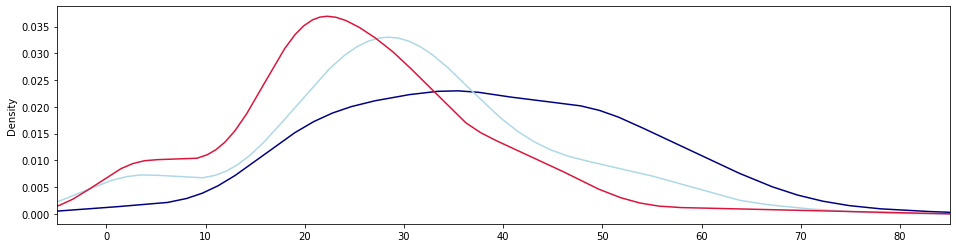

In [ ]:
df[df['Pclass']==1]['Age'].plot(kind ='density', xlim=(-5,85), figsize=(16,4), color ='navy')
df[df['Pclass']==2]['Age'].plot(kind ='density', xlim=(-5,85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind = 'density', xlim=(-5, 85),figsize=(16,4), color='crimson')


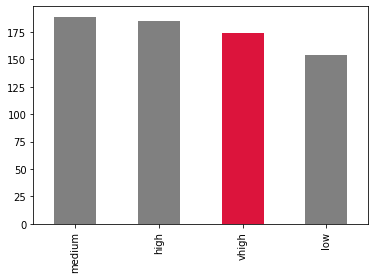

In [ ]:
df['fare_groups'].value_counts().plot(kind ='bar', color=['gray','gray', 'crimson', 'gray']);

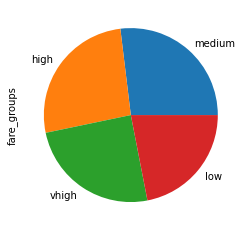

In [ ]:
df['fare_groups'].value_counts().plot(kind ='pie', figsize =(4,4));

In [ ]:
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


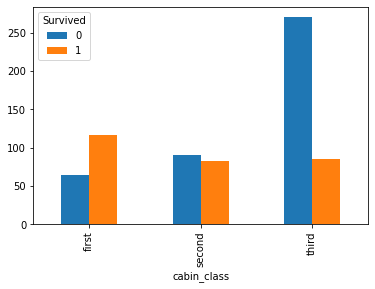

In [ ]:
cab_death.plot(kind ='bar')

In [ ]:
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize = 'columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


In [ ]:
cab_death2= pd.crosstab(df['cabin_class'], df['Survived'], normalize = 'index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


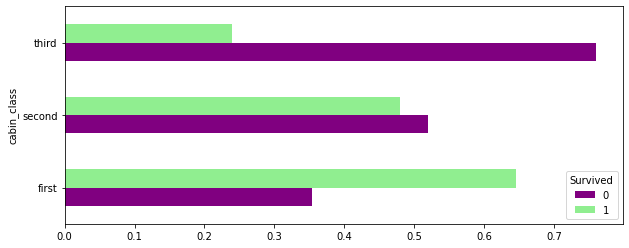

In [ ]:
cab_death2.plot(kind ='barh', color = ['purple', 'lightgreen'], figsize = (10,4))

In [ ]:
df['Age'].mean()

29.618011283497882

In [ ]:
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

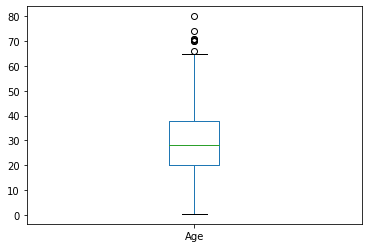

In [ ]:
df['Age'].plot(kind ='box')

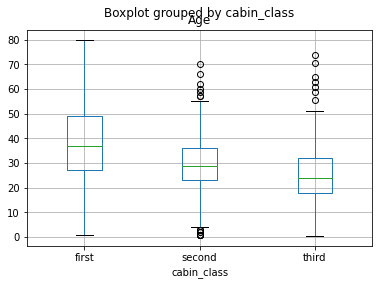

In [ ]:
df.boxplot(column = 'Age', by = 'cabin_class')

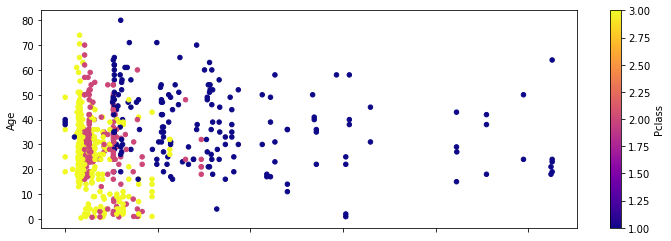

In [ ]:
#Comper two to three continous variables:
df.plot(kind ='scatter', x='Fare', y ='Age', c='Pclass', colormap ='plasma', figsize = (12, 4));

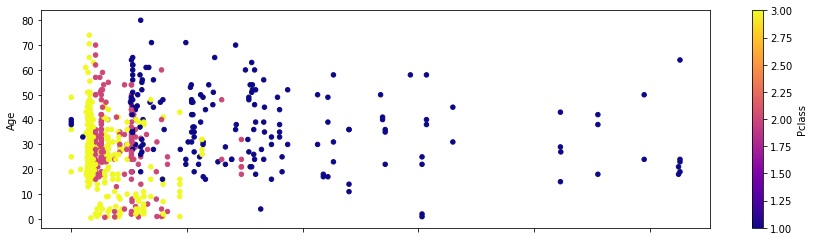

In [ ]:
df.plot(kind ='scatter', x ='Fare', y='Age', c='Pclass', colormap = 'plasma', figsize =(15,4));

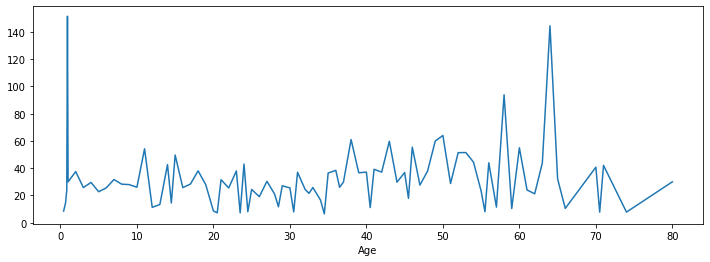

In [ ]:
#line chart : age by fare:
df.groupby('Age')['Fare'].mean().plot(figsize = (12,4));

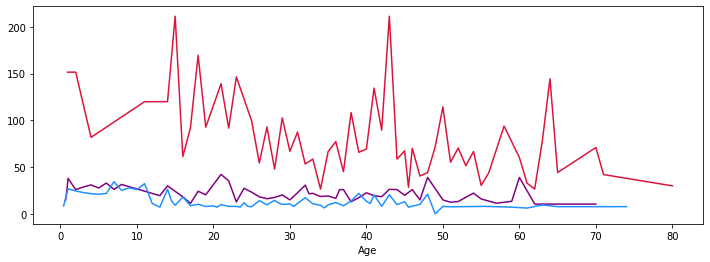

In [ ]:
mycolors = ['crimson','purple','dodgerblue']
for x in [1,2,3]:
    df[df['Pclass'] == x].groupby('Age')['Fare'].mean().plot(figsize = (12, 4), color = mycolors[x-1])

In [ ]:
corr_matrix = df.corr() #This is a correlation matrix
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


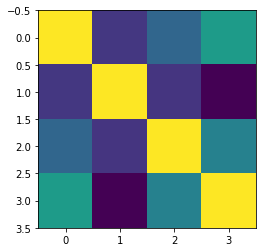

In [ ]:
plt.imshow(corr_matrix); #this is atype of heatmap

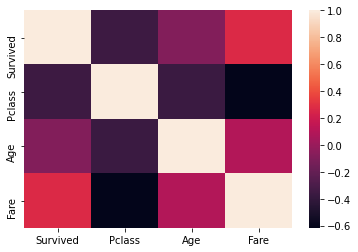

In [ ]:
sns.heatmap(corr_matrix); #more about seaborn further down.

# Real Life Review: Where are America's Liberians

In [ ]:
import seaborn as sns
import numpy as numy
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/sample_data/librarians.zip', 'r') as zipObj:
  zipObj.extractall()

#all files are extracted from the zip file into the directory; this method was more suitable for the purpose

In [ ]:
libraryfile = pd.read_csv('/content/librarians/librarians-by-msa.csv')
libraryfile

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",**,**,**,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6
...,...,...,...,...,...,...
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38
370,CA,"Modesto, CA",60,30.1,0.359,0.35
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3


In [ ]:
libraryfile.head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",**,**,**,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6


In [ ]:
libraryfile.tail() #there are any missing values, so looking for values for the particular state

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38
370,CA,"Modesto, CA",60,30.1,0.359,0.35
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3
372,UT,"Ogden-Clearfield, UT",30,15.5,0.163,0.16


In [ ]:
libraryfile.isnull()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
368,False,False,False,False,False,False
369,False,False,False,False,False,False
370,False,False,False,False,False,False
371,False,False,False,False,False,False


In [ ]:
libraryfile.isnull().sum() #this indicated that weren't missing values; however will look to see if the duplicate state values to fill

prim_state      0
area_name       0
tot_emp         0
emp_prse        0
jobs_1000       0
loc_quotient    0
dtype: int64

In [ ]:
conditions = (libraryfile['prim_state'] =='OH') | (libraryfile['prim_state']=='WA') 
conditions # the conditions is make sure there are data avaliable for the plots

0       True
1       True
2      False
3      False
4      False
       ...  
368    False
369    False
370    False
371    False
372    False
Name: prim_state, Length: 373, dtype: bool

In [ ]:
libraryfile[conditions] #there are other values availabe for those prim state, so instead of outliers, we will fill in with the median

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",**,**,**,**
28,OH,"Dayton, OH",610,29.7,1.652,1.6
57,WA,"Olympia, WA",140,17.6,1.446,1.4
79,OH,"Canton-Massillon, OH",220,8.7,1.325,1.29
103,OH,"Cleveland-Elyria-Mentor, OH",1250,13.5,1.241,1.21
117,OH,"Toledo, OH",350,11.6,1.19,1.16
126,WA,"Spokane, WA",230,4.5,1.17,1.14
135,WA,"Yakima, WA",90,4.2,1.132,1.1
151,WA,"Tacoma, WA Metropolitan Division",290,6.6,1.093,1.06


In [ ]:
state1 =(libraryfile['prim_state']=='OH')
state1

0       True
1      False
2      False
3      False
4      False
       ...  
368    False
369    False
370    False
371    False
372    False
Name: prim_state, Length: 373, dtype: bool

In [ ]:
groupOH =libraryfile[state1]
groupOH

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
28,OH,"Dayton, OH",610,29.7,1.652,1.6
79,OH,"Canton-Massillon, OH",220,8.7,1.325,1.29
103,OH,"Cleveland-Elyria-Mentor, OH",1250,13.5,1.241,1.21
117,OH,"Toledo, OH",350,11.6,1.19,1.16
216,OH,"Cincinnati-Middletown, OH-KY-IN",970,6,0.971,0.94
243,OH,"Columbus, OH",860,23.5,0.917,0.89
257,OH,"Akron, OH",280,10.8,0.88,0.85
262,OH,"Sandusky, OH",30,13.3,0.871,0.85
280,OH,"Mansfield, OH",40,17.7,0.816,0.79


In [ ]:
dropthis = (groupOH['tot_emp'] !='**')

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
#use the the group to find the median value for each * value to fill in

#the median couldn't be optain with astricks so firtst dropping dataset
groupmedian =groupOH[dropthis].median()
groupmedian

tot_emp    0.0
dtype: float64

In [ ]:
groupOH.shape

(11, 6)

In [ ]:
statedrop = (libraryfile['tot_emp']=="**")
libraryfile[statedrop].dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
libraryfile['tot_emp'].fillna(groupmedian, inplace =True)
libraryfile

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",**,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",**,**,**,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6
...,...,...,...,...,...,...
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38
370,CA,"Modesto, CA",60,30.1,0.359,0.35
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3


In [ ]:
libraryfile['tot_emp'][1] = 0

In [ ]:
libraryfile['tot_emp'][0]=0

In [ ]:
libraryfile # was able to change the data values, the * was not read or seen as an nan; it was best to apply a value of zero fro the missing regions

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",0,**,**,**
1,WA,"Mount Vernon-Anacortes, WA",0,**,**,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6
...,...,...,...,...,...,...
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38
370,CA,"Modesto, CA",60,30.1,0.359,0.35
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3


In [ ]:
libraryfile['emp_prse'][0] =0
libraryfile['jobs_1000'][0] =0
libraryfile['loc_quotient'][0] =0
libraryfile['emp_prse'][1] =0
libraryfile['jobs_1000'][1] =0
libraryfile['loc_quotient'][1] =0

In [ ]:
libraryfile #I wasn't able to use the iloc method with the literals, but the data has been filled to obtain statistics and plots

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",0,0,0,0
1,WA,"Mount Vernon-Anacortes, WA",0,0,0,0
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6
...,...,...,...,...,...,...
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38
370,CA,"Modesto, CA",60,30.1,0.359,0.35
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3


In [ ]:
#there aren't any categorical data in the data file; however we can run statistics values and plot based on statistics:
totemply = libraryfile['tot_emp'].count().mean()
totemply

373.0

In [ ]:
libraryfile['tot_emp'].dtypes

dtype('O')

In [ ]:
#could't set up a histogram because data type was seen as object, had to chang values to int

In [ ]:
libraryfile['tot_emp'].plot(kind ='hist')

TypeError: ignored

In [ ]:
libraryfile.dtypes

prim_state      object
area_name       object
tot_emp         object
emp_prse        object
jobs_1000       object
loc_quotient    object
dtype: object

In [ ]:
def valtype(cell_count):
  return float(cell_count)

In [ ]:
libraryfile['float_tot_emp'] = libraryfile['tot_emp'].apply(valtype) #function to change the data type into new attribute column

In [ ]:
libraryfile

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient,float_tot_emp
0,OH,"Springfield, OH",0,0,0,0,0.0
1,WA,"Mount Vernon-Anacortes, WA",0,0,0,0,0.0
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62,160.0
3,PR,"Ponce, PR",180,3.6,3.434,3.34,180.0
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6,50.0
...,...,...,...,...,...,...,...
368,CA,"Oxnard-Thousand Oaks-Ventura, CA",120,7.8,0.415,0.4,120.0
369,CA,"Santa Ana-Anaheim-Irvine, CA Metropolitan Divi...",570,7,0.392,0.38,570.0
370,CA,"Modesto, CA",60,30.1,0.359,0.35,60.0
371,CA,"Bakersfield-Delano, CA",90,9.8,0.304,0.3,90.0


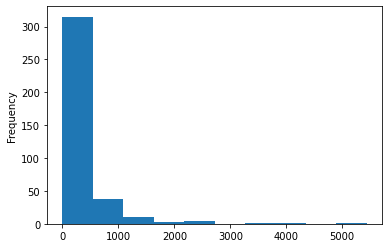

In [ ]:
libraryfile['float_tot_emp'].plot(kind='hist') #histogram of total employees

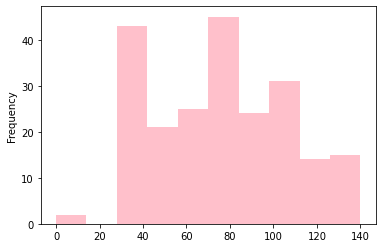

In [ ]:
libraryfile = libraryfile[libraryfile['float_tot_emp']<150]
libraryfile['float_tot_emp'].plot(kind ='hist', color ='pink') #This is the occurrence of states with employees less than 150 
      #We were able to remove several outliers, including the first obsecure pair

In [ ]:
#Shifting to catecorical using the bins
farebins=[0,10,25,150,500]
farelabels=['low','medium','high','vhigh']
prop['faregroup']=pd.cut(libraryfile['float_tot_emp'], bins= farebins, labels= farelabels)
results = prop['faregroup'].value_counts().sort_index()
results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


low         0
medium      0
high      218
vhigh       0
Name: faregroup, dtype: int64

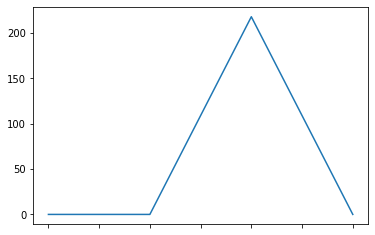

In [ ]:
results.plot()

In [ ]:
#plot a different attribute; will have to shift the data type to float instead of object
libraryfile['float_job_1000']= libraryfile['jobs_1000'].apply(valtype)

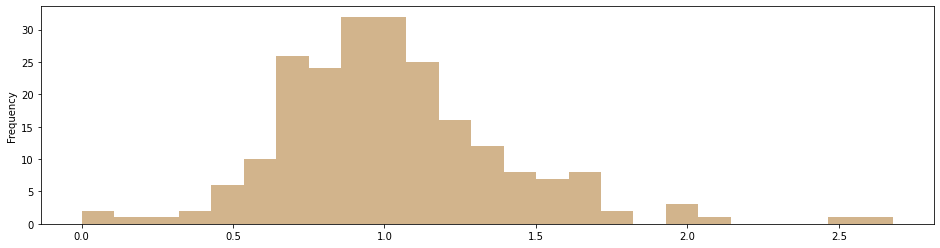

In [ ]:
libraryfile['float_job_1000'].plot(kind ='hist', bins = 25, figsize= (16,4), color ='tan')

In [ ]:
#stack histograms:
#There aren't any categorical; however, there are multiple city data sets within each state;
libraryfile[libraryfile['prim_state']=='PR']['tot_emp'].plot(kind ='hist', bins = 25, figsize =(16,2), alpha =0.5)
libraryfile[libraryfile['prim_state']=='CA']['tot_emp'].plot(kind ='hist', bins = 25, figsize =(16,2), alpha =0.5)
libraryfile[libraryfile['prim_state']=='UT']['tot_emp'].plot(kind ='hist', bins = 25, figsize =(16,2), alpha =0.5)

TypeError: ignored

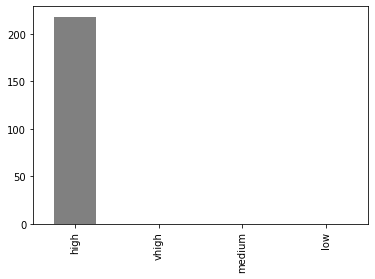

In [ ]:
prop['faregroup'].value_counts().plot(kind ='bar', color=['gray', 'pink', 'crimson', 'gray']); 
#this shows that most of totals are high counts

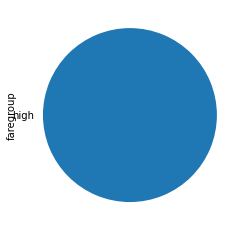

In [ ]:
prop['faregroup'].value_counts().plot(kind='pie', figsize=(4,4)); #reads that all of data sets are high

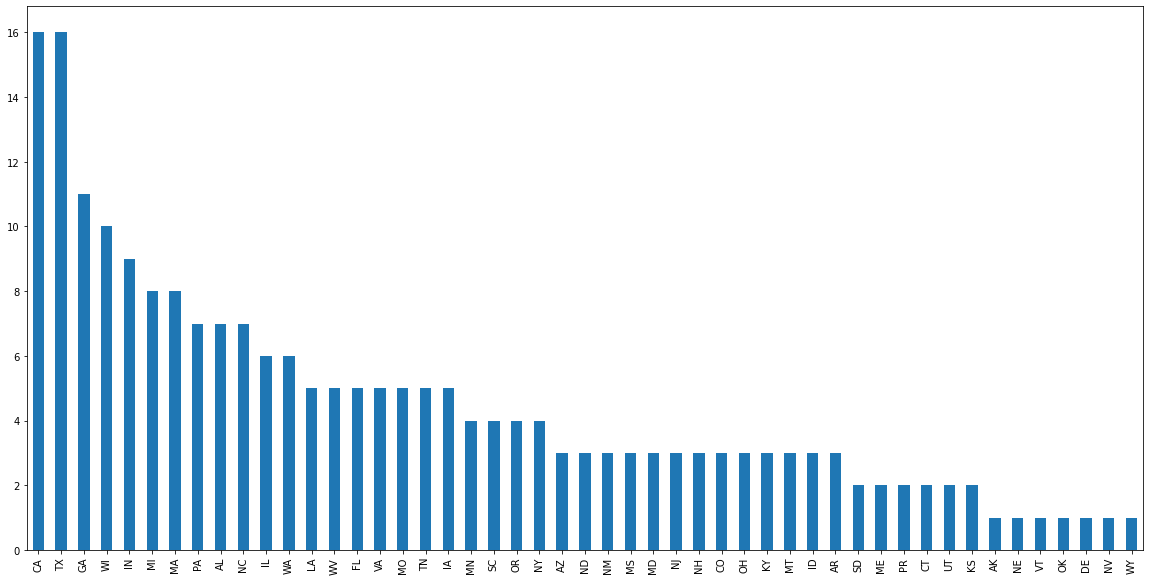

In [ ]:
libraryfile['prim_state'].value_counts().plot(kind ='bar', figsize = (20, 10))

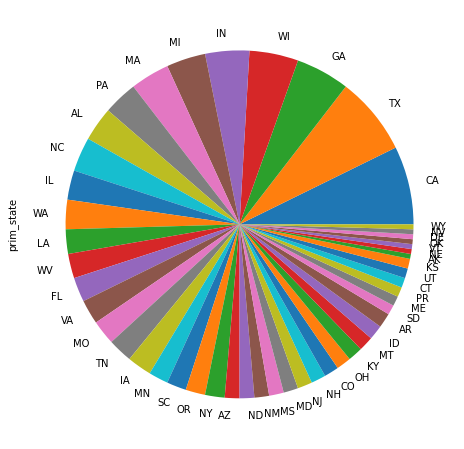

In [ ]:
libraryfile['prim_state'].value_counts().plot(kind ='pie', figsize=(8,8)) # The State count provided a more detail statistic of pie graph
#There are more counts in california

In [ ]:
libraryfile['float_tot_emp'].mean() #there is mean average of 304 total employees 

304.0750670241287

In [ ]:
cab_age = libraryfile.groupby('prim_state')['float_tot_emp'].mean() #Average employee for each state
cab_age

prim_state
AK      95.000000
AL     116.363636
AR     170.000000
AZ     276.000000
CA     358.800000
CO     261.428571
CT     381.666667
DC    3340.000000
DE     235.000000
FL     312.105263
GA     247.692308
HI     470.000000
IA     122.500000
ID      92.500000
IL     598.888889
IN     165.384615
KS     152.500000
KY     206.000000
LA     182.500000
MA     342.307692
MD     586.000000
ME     126.666667
MI     173.846154
MN     360.000000
MO     372.500000
MS     152.500000
MT      56.666667
NC     257.857143
ND     100.000000
NE     305.000000
NH     102.500000
NJ     502.857143
NM      95.000000
NV     270.000000
NY     941.666667
OH     435.454545
OK     340.000000
OR     272.000000
PA     377.692308
PR     304.000000
RI     710.000000
SC     212.857143
SD      80.000000
TN     236.000000
TX     354.400000
UT     162.500000
VA     262.222222
VT     120.000000
WA     268.888889
WI     149.166667
WV      80.000000
WY      40.000000
Name: float_tot_emp, dtype: float64

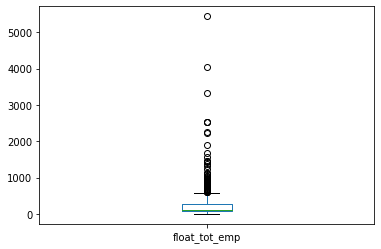

In [ ]:
libraryfile['float_tot_emp'].plot(kind = 'box') #The box-whisky plot that shows an outliers of the employees

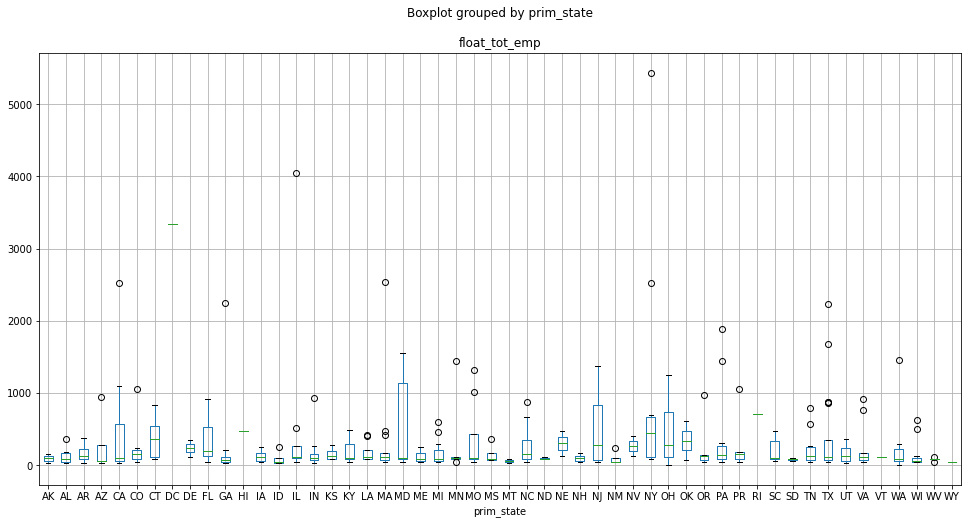

In [ ]:
libraryfile.boxplot(column='float_tot_emp', by = 'prim_state', figsize=(16,8));#indicates the  employee number by state

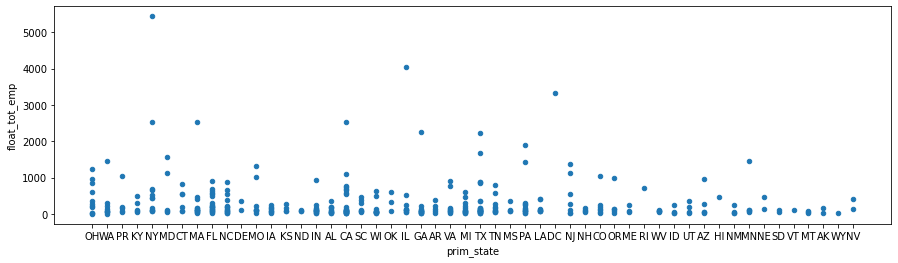

In [ ]:
libraryfile.plot(kind ='scatter', x='prim_state', y='float_tot_emp', figsize=(15,4));

ValueError: ignored

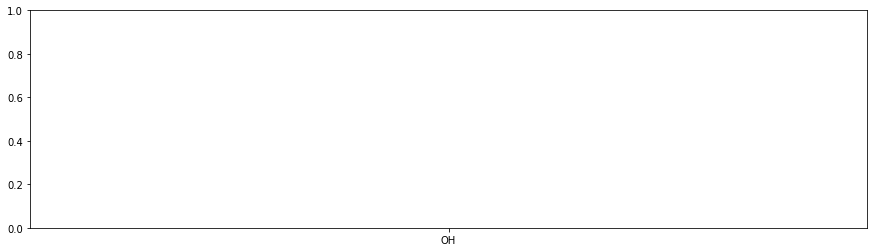

In [ ]:
libraryfile.plot(kind ='scatter', x = 'prim_state', y='float_tot_emp', c='area_name', colormap ='plasma', figsize=(15,4))
#may need to group by state in order to see the categorical view of 

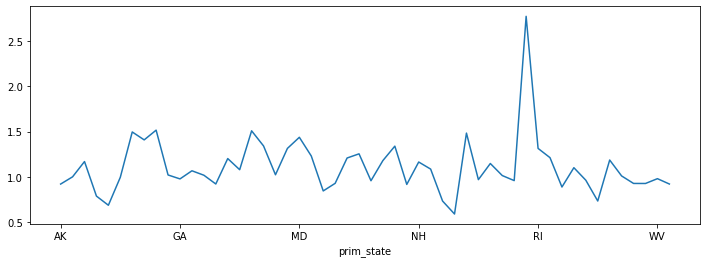

In [ ]:
libraryfile.groupby('prim_state')['float_job_1000'].mean().plot(figsize=(12,4));

In [ ]:
corr_matrix =  libraryfile.corr()
corr_matrix

,float_tot_emp,float_job_1000
float_tot_emp,1.000000,0.051117
float_job_1000,0.051117,1.000000


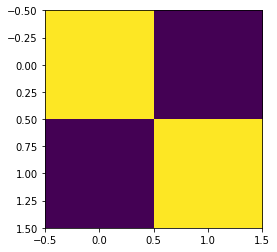

In [ ]:
plt.imshow(corr_matrix);

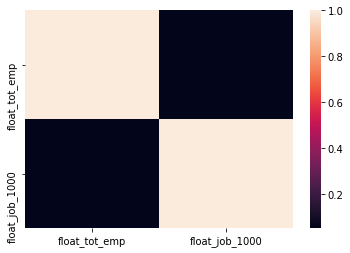

In [ ]:
sns.heatmap(corr_matrix);


# Intro to matplotlib

In [ ]:
import numpy as numy
x = numy.linspace(0,5,11)
y= x ** 2

In [ ]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

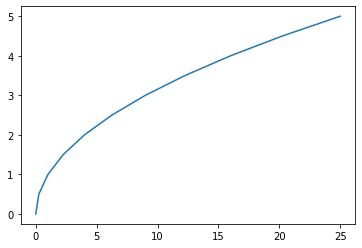

In [ ]:
plt.plot(y,x);

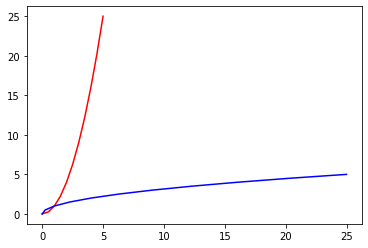

In [ ]:
plt.plot(x,y,'r') #Example of plotting to plots on one graph
plt.plot(y,x,'b');

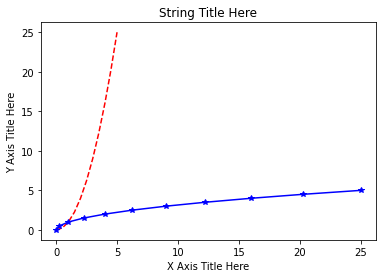

In [ ]:
plt.plot(x, y, 'r--') #Sequence to adding labels, and texture
plt.plot(y,x,'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

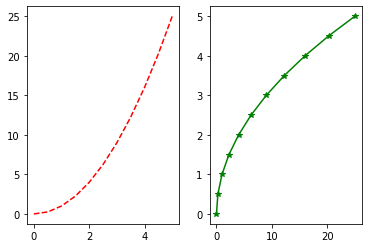

In [ ]:
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

Text(0.5, 1.0, 'Set Title')

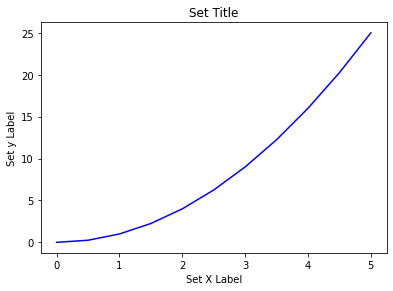

In [ ]:
#figure method:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8,0.8])
axes.plot(x,y, 'b')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

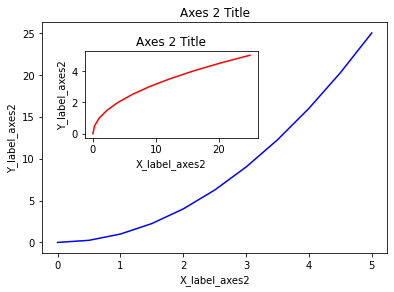

In [ ]:
#create blank canvas:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1,0.8,0.8]) #main axes
axes2 = fig.add_axes([0.2, 0.5,0.4, 0.3])

axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

AttributeError: ignored

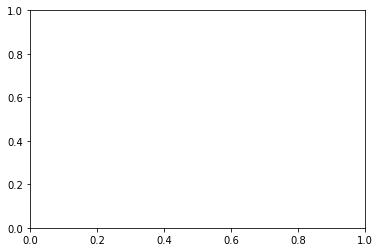

<Figure size 432x288 with 0 Axes>

In [ ]:
#subplots method:
plt.subplots()
fig = plt.figure()
ax = fig.add_subplots(111)


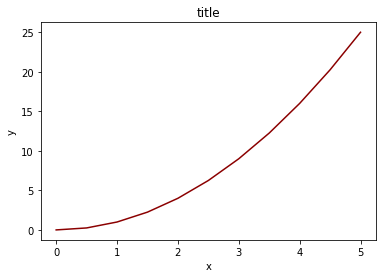

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(x,y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

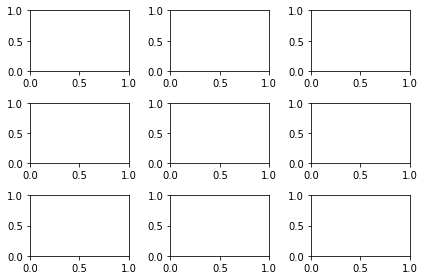

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)

fig
plt.tight_layout()

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a23ed99b0>,
      dtype=object)

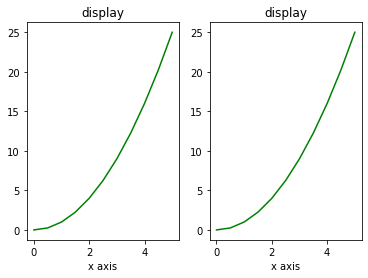

In [ ]:
fig, axes = plt.subplots(nrows =1, ncols =2)
for ax in axes:
  ax.plot(x,y,'g')
  ax.set_xlabel('x axis')
  ax.set_title('display')

  plt;

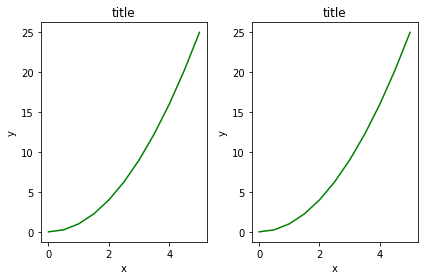

In [ ]:
fig, axes = plt.subplots(nrows =1, ncols = 2)

for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

  fig
  plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(8,4), dpi =100)

<Figure size 800x400 with 0 Axes>

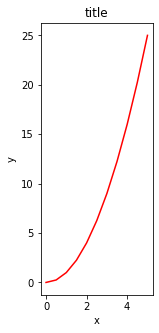

In [ ]:
#the same argument can also be passed to layout managers
fig, axes = plt.subplots(figsize =(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [43]:
# More Work Here
import seaborn as sns
import pandas as pd
import numpy as numy
import matplotlib.pyplot as plt
from zipfile import ZipFile

with ZipFile('/content/sample_data/march-madness-predictions.zip', 'r') as zippy :
   zippy.extractall()



In [44]:
marchfile = pd.read_csv('/content/march-madness-predictions/bracket-29.csv')
marchfile

,team_id,team_name,team_seed,team_region,playin_flag,team_alive,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win
0,57,Florida,1,South,0,1,1.0,1.0,0.762030,0.549531,0.348758,0.209383,0.113245
1,399,Albany,16a,South,1,0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,116,Mount St. Mary's,16b,South,1,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,38,Colorado,8,South,0,0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,221,Pittsburgh,9,South,0,1,1.0,1.0,0.237970,0.135883,0.066650,0.030798,0.012839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,309,Louisiana-Lafayette,14,West,0,0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
64,2483,Oregon,7,West,0,1,1.0,1.0,0.228003,0.119930,0.049100,0.017409,0.006812
65,252,Brigham Young,10,West,0,0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
66,275,Wisconsin,2,West,0,1,1.0,1.0,0.771997,0.463760,0.221544,0.112582,0.060768


In [45]:
marchfile.head()

,team_id,team_name,team_seed,team_region,playin_flag,team_alive,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win
0,57,Florida,1,South,0,1,1.0,1.0,0.76203,0.549531,0.348758,0.209383,0.113245
1,399,Albany,16a,South,1,0,1.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
2,116,Mount St. Mary's,16b,South,1,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
3,38,Colorado,8,South,0,0,1.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
4,221,Pittsburgh,9,South,0,1,1.0,1.0,0.23797,0.135883,0.066650,0.030798,0.012839


In [46]:
marchfile.tail()

,team_id,team_name,team_seed,team_region,playin_flag,team_alive,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win
63,309,Louisiana-Lafayette,14,West,0,0,1.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
64,2483,Oregon,7,West,0,1,1.0,1.0,0.228003,0.11993,0.049100,0.017409,0.006812
65,252,Brigham Young,10,West,0,0,1.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
66,275,Wisconsin,2,West,0,1,1.0,1.0,0.771997,0.46376,0.221544,0.112582,0.060768
67,44,American University,15,West,0,0,1.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000


In [47]:
marchfile.isnull().sum()

team_id        0
team_name      0
team_seed      0
team_region    0
playin_flag    0
team_alive     0
rd1_win        0
rd2_win        0
rd3_win        0
rd4_win        0
rd5_win        0
rd6_win        0
rd7_win        0
dtype: int64

In [48]:
x = marchfile['team_name']
y= marchfile['rd3_win']

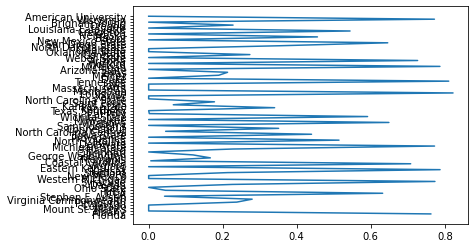

In [49]:
plt.plot(y,x) #Plot of the teams and Round 3 winnings

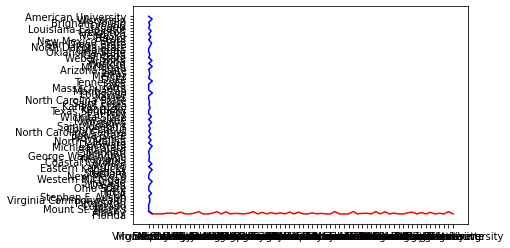

In [50]:
plt.plot(x,y,'r')
plt.plot(y,x,'b');

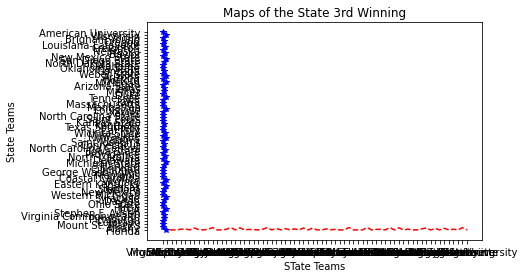

In [51]:
plt.plot(x,y, 'r--')
plt.plot(y,x, 'b*-')
plt.xlabel('STate Teams')
plt.ylabel('State Teams')
plt.title('Maps of the State 3rd Winning');

Text(0.5, 1.0, 'Maps of State 3rd Winning')

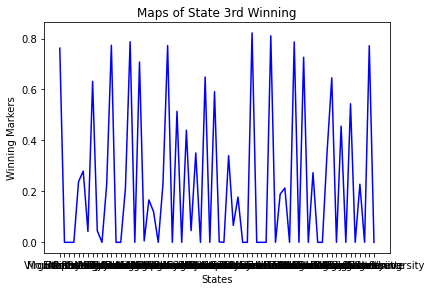

In [52]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x,y, 'b')
axes.set_xlabel('States')
axes.set_ylabel('Winning Markers')
axes.set_title('Maps of State 3rd Winning')

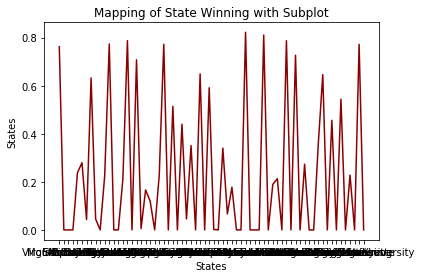

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x,y, 'darkred')
axes.set_xlabel('States')
axes.set_ylabel('States')
axes.set_title('Mapping of State Winning with Subplot');


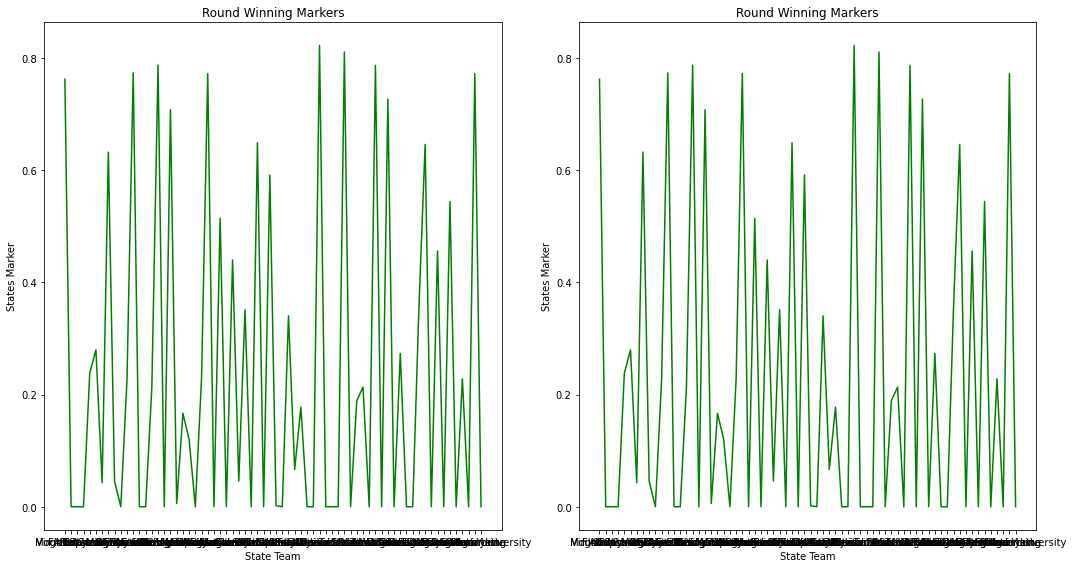

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(15,8))

for ax in axes:
  ax.plot(x,y, 'g')
  ax.set_xlabel('State Team')
  ax.set_ylabel('States Marker')
  ax.set_title('Round Winning Markers')

  fig
  plt.tight_layout()

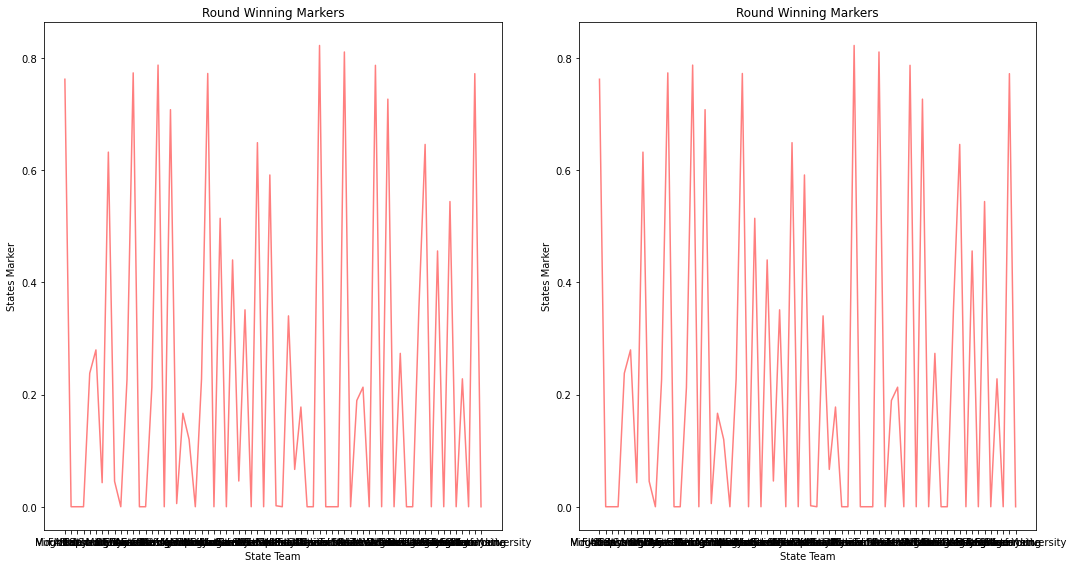

In [55]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(15,8))

for ax in axes:
  ax.plot(x,y, 'g', color ='red', alpha =0.5)
  ax.set_xlabel('State Team')
  ax.set_ylabel('States Marker')
  ax.set_title('Round Winning Markers')

  fig
  plt.tight_layout()

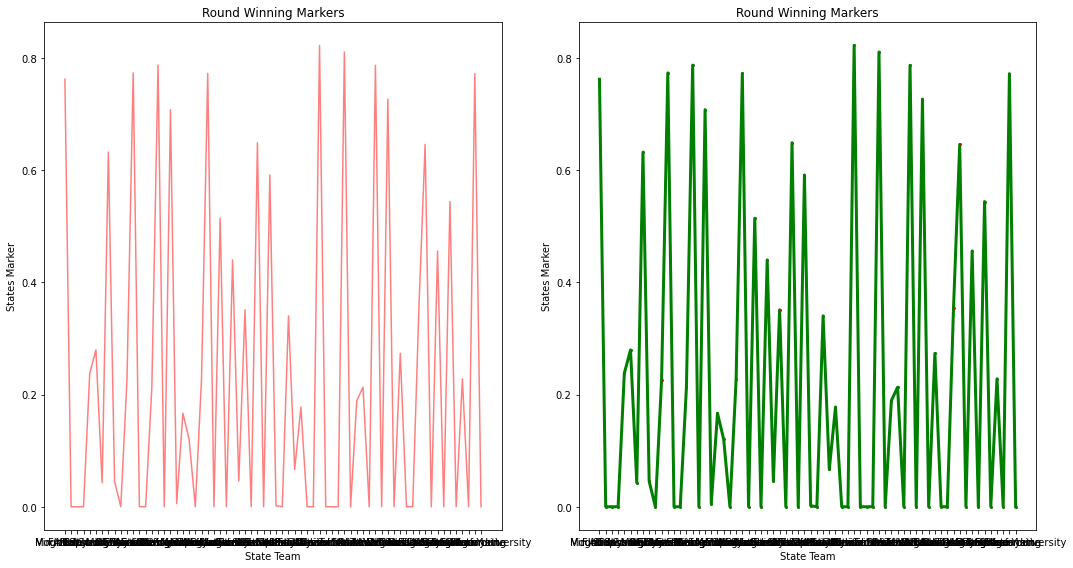

In [56]:
#an example of plot with line width and markersize
ax.plot(x, y, color='green', lw = 3, ls='-', marker ='o', markersize = 2, markerfacecolor = 'red');
fig

#DateTime Stamp:

In [3]:
import numpy as numy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile as ZipFile

with ZipFile('/content/sample_data/historical-ncaa-forecasts.zip', 'r') as Zippy:
  Zippy.extractall()

In [4]:
historyForcast = pd.read_csv('/content/historical-ncaa-forecasts/historical-538-ncaa-tournament-model-results.csv')
historyForcast

,year,round,favorite,underdog,favorite_probability,favorite_win_flag
0,2014,2,Texas,Arizona State,0.501,1
1,2013,2,Illinois,Colorado,0.504,1
2,2013,1,James Madison,Long Island,0.506,1
3,2011,2,Cincinnati,Missouri,0.509,1
4,2012,3,Cincinnati,Florida State,0.509,1
...,...,...,...,...,...,...
248,2011,2,Kansas,Boston University,0.990,1
249,2012,2,Kentucky,Western Kentucky,0.991,1
250,2013,2,Louisville,North Carolina A&T,0.995,1
251,2011,2,Duke,Hampton,0.995,1


In [5]:
with ZipFile('/content/sample_data/births.zip', 'r') as Zipper:
  Zipper.extractall()

In [6]:
draft = pd.read_csv('/content/births/US_births_2000-2014_SSA.csv')
draft

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [7]:
draft.dtypes

year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object

In [8]:
#create time stamp of values: This function is used to shift each data cell to one string date stamp that can be used apply the date time stamp method
year =[]
month =[]
day =[]
weekday = []
month_date = ''
day_week = ''
def createdate(year, month, day, weekday):
  for years in year:
    years = year
  for months in month:
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    months_date =switcher.get(int(month), 'Invalid Month')
  for days in day:
    days = day
  for weekdays in weekday:
    switcher ={
          1:'Monday',
          2:'Tuesday',
          3:'Wednesday',
          4:'Thursday',
          5:'Friday',
          6:'Saturday',
          7:'Sunday',
      }
    day_week= switcher.get(int(weekdays), "Invalid Month")
    datas = day_week + "," + months_date + "," + days +"," + years
  return datas

In [9]:
date = createdate('2013','12','23','7') #Sample of functions
date

'Sunday,December,23,2013'

In [40]:
import datetime

def toWord(data): #The datestamp method requires the data to be a string type; this shifts the data
  return str(data)


monthss = draft['month'].apply(toWord)
year =draft['year'].apply(toWord)
day = draft['date_of_month'].apply(toWord)
week = draft['day_of_week'].apply(toWord)
r=0
presidents = ["Washington", "Adams", "Jefferson", "Madison", "Monroe", "Adams", "Jackson"]
for i in range(len(monthss)):
    monthz = monthss[i]
    yearz= year[i] 
    dayz = day[i] 
    week_day = week[i]
    timer = createdate(yearz,monthz,dayz,week_day)
    datetim = datetime.datetime(int(yearz),int(monthz), int(dayz)) 
    draft['dateTimestamp'] = timer
    draft['datetime2'] = datetim


In [34]:
draft['dateTimestamp'].head()

0    Wednesday,December,31,2014
1    Wednesday,December,31,2014
2    Wednesday,December,31,2014
3    Wednesday,December,31,2014
4    Wednesday,December,31,2014
Name: dateTimestamp, dtype: object

In [41]:
from datetime import datetime # example of retrieving the month value for the 34th index a date time object was created in the for loop function

print(draft['datetime2'][34].strftime("%B"))

December


In [42]:
draft['datetime2'][45].strftime("%A %d. %B %Y") #The is method provides the week day , day. month, and year only with the date time method, compared to the function created earlier

'Wednesday 31. December 2014'